## Counting objects on natural images

### 1. Open image

In [1]:
import sys
sys.path.append("../../../images/")

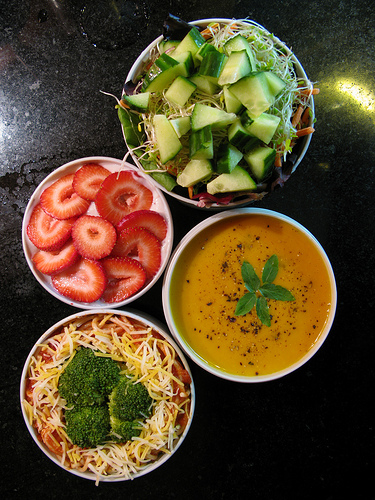

In [2]:
from PIL import Image

img_name = "2375454.jpg"
image = Image.open("../../../images/" + img_name)
image

In [3]:
import torch
sys.path.append("../code/")
import utils

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = utils.get_model_preprocess(device, model_type="ViT-B/32")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


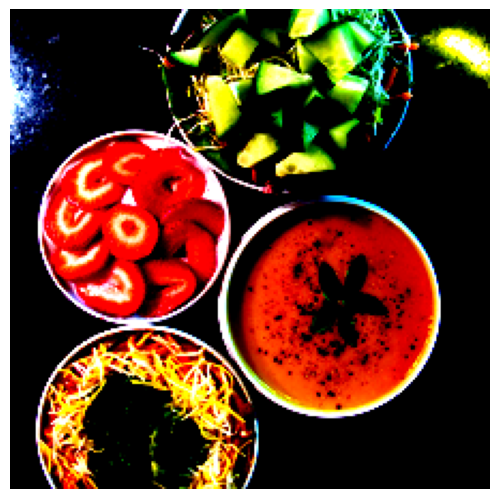

In [5]:
import matplotlib.pyplot as plt

img = preprocess(Image.open("../../../images/" + img_name)).permute(1,2,0)
plt.axis('off')
plt.imshow(img)
plt.subplots_adjust(bottom = 0)
plt.subplots_adjust(top = 1)
plt.subplots_adjust(right = 1)
plt.subplots_adjust(left = 0)
plt.savefig('v2.png', bbox_inches='tight', pad_inches=0, transparent=True)

In [6]:
img.size()
for x in range(224):
    for y in range(224):
        rgb = img[x][y]
        print(rgb)

tensor([-0.3908, -0.5965, -0.3995])
tensor([-0.3616, -0.5815, -0.2573])
tensor([-0.3908, -0.5815, -0.2573])
tensor([-0.4200, -0.4914, -0.2431])
tensor([-0.6974, -0.8066, -0.6412])
tensor([-0.8580, -0.8967, -0.7977])
tensor([-1.0769, -1.1218, -0.8261])
tensor([-0.9893, -1.0317, -0.7550])
tensor([-1.2375, -1.2268, -1.0536])
tensor([-1.0623, -1.0617, -0.7266])
tensor([-1.1791, -1.1218, -0.9114])
tensor([-1.2813, -1.2268, -0.9825])
tensor([-1.1061, -1.0167, -0.7123])
tensor([-0.5222, -0.6415, -0.4564])
tensor([-0.7996, -0.9117, -0.6555])
tensor([-1.1937, -1.1368, -0.8830])
tensor([-1.3543, -1.2869, -1.0394])
tensor([-1.3543, -1.3169, -1.0536])
tensor([-1.1937, -1.1368, -0.8972])
tensor([-1.1645, -1.0767, -0.7977])
tensor([-1.1937, -1.1218, -0.9114])
tensor([-1.1061, -1.0317, -0.8261])
tensor([-1.1207, -1.0617, -0.7977])
tensor([-1.1207, -1.0767, -0.8119])
tensor([-0.9893, -0.9567, -0.6412])
tensor([-1.1353, -1.0918, -0.7834])
tensor([-1.1353, -1.1068, -0.8261])
tensor([-1.2667, -1.2268, -0

In [7]:
normalized_image = torch.nn.functional.normalize(img, p=2.0, dim = 2)

In [8]:
img.size()
for x in range(224):
    for y in range(224):
        rgb = normalized_image[x][y]
        print(rgb)

tensor([-0.4781, -0.7298, -0.4887])
tensor([-0.4943, -0.7949, -0.3517])
tensor([-0.5236, -0.7791, -0.3447])
tensor([-0.6081, -0.7116, -0.3519])
tensor([-0.5605, -0.6483, -0.5154])
tensor([-0.5816, -0.6078, -0.5407])
tensor([-0.6116, -0.6371, -0.4691])
tensor([-0.6120, -0.6382, -0.4670])
tensor([-0.6077, -0.6025, -0.5174])
tensor([-0.6367, -0.6364, -0.4355])
tensor([-0.6321, -0.6014, -0.4886])
tensor([-0.6319, -0.6050, -0.4845])
tensor([-0.6653, -0.6115, -0.4284])
tensor([-0.5527, -0.6791, -0.4831])
tensor([-0.5801, -0.6614, -0.4755])
tensor([-0.6384, -0.6079, -0.4722])
tensor([-0.6335, -0.6019, -0.4862])
tensor([-0.6261, -0.6088, -0.4871])
tensor([-0.6361, -0.6057, -0.4781])
tensor([-0.6560, -0.6065, -0.4493])
tensor([-0.6368, -0.5984, -0.4862])
tensor([-0.6418, -0.5986, -0.4793])
tensor([-0.6450, -0.6110, -0.4590])
tensor([-0.6392, -0.6141, -0.4630])
tensor([-0.6516, -0.6301, -0.4223])
tensor([-0.6454, -0.6206, -0.4453])
tensor([-0.6350, -0.6191, -0.4621])
tensor([-0.6275, -0.6077, -0

(370, 370)


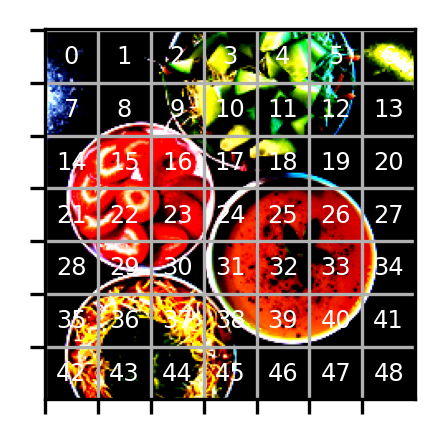

In [9]:
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

def plot_with_patches(img_name):
    image = Image.open("../../../images/" + img_name)
    my_dpi = 300

    # Set up figure
    print(image.size)
    fig = plt.figure(
        figsize=(float(image.size[0]) / my_dpi, float(image.size[1]) / my_dpi),
        dpi=my_dpi,
    )
    ax = fig.add_subplot(111)

    # Remove whitespace from around the image
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    # Set the gridding interval: here we use the major tick interval
    myInterval = image.size[0] / 7
    loc = plticker.MultipleLocator(base=myInterval)
    ax.xaxis.set_major_locator(loc)
    ax.yaxis.set_major_locator(loc)

    # Add the grid
    ax.grid(which="major", axis="both", linestyle="-")

    # Add the image
    ax.imshow(image)

    # Find number of gridsquares in x and y direction
    nx = abs(int(float(ax.get_xlim()[1] - ax.get_xlim()[0]) / float(myInterval)))
    ny = abs(int(float(ax.get_ylim()[1] - ax.get_ylim()[0]) / float(myInterval)))

    # Add some labels to the gridsquares
    for j in range(ny):
        y = myInterval / 2 + j * myInterval
        for i in range(nx):
            x = myInterval / 2.0 + float(i) * myInterval
            ax.text(
                # x, y, "{:d}".format(i + j * nx + 1), color="w", ha="center", va="center"
                x,
                y,
                "{:d}".format(i + j * nx),
                color="w",
                ha="center",
                va="center",
                fontsize="xx-small",
            )

    ax.set_xticklabels([])
    ax.set_yticklabels([])

plot_with_patches("natural_image.png")
# plot_with_patches(normalized_image)

### 2. Get representations

In [10]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = utils.get_model_preprocess(device, model_type="ViT-B/32")

In [11]:
img_path = "../../../images/2375454.jpg"
reprs = utils.get_repr(img_path, device, model, preprocess)

### 3. Counting

In [12]:
def stack_reprs_2patches(patch1, patch2, repr, layer):

    input1 = utils.filter_repr(
        layer, [patch1], repr, single_patch=True, padding_up_to=None
    )
    input2 = utils.filter_repr(
        layer, [patch2], repr, single_patch=True, padding_up_to=None
    )
    z = torch.stack(
        [torch.from_numpy(input1[0]), torch.from_numpy(input2[0])]
    ) 
    z = z.flatten()
    return z

In [13]:
def same_object(patch_id1, patch_id2, model, reprs, layer):
    # Check whether patch_id1 and patch_id2 are the same object twice (in both directions)
    z1 = stack_reprs_2patches(patch_id1, patch_id2, reprs, layer)
    z2 = stack_reprs_2patches(patch_id2, patch_id1, reprs, layer)

    input = torch.stack((z1, z2))

    out = model.forward(input)
    y1, y2 = torch.softmax(out, dim=1)
    prob = np.mean(
        (y1[1].item(), y2[1].item())
    )  # weighted average of probabilities in both directions

    return 1 if prob >= 0.5 else 0

In [14]:
def get_prob_same_object(patch_id1, patch_id2, model, reprs, layer):
    # Check whether patch_id1 and patch_id2 are the same object twice (in both directions)
    z1 = stack_reprs_2patches(patch_id1, patch_id2, reprs, layer)
    z2 = stack_reprs_2patches(patch_id2, patch_id1, reprs, layer)

    input = torch.stack((z1, z2))

    out = model.forward(input)
    y1, y2 = torch.softmax(out, dim=1)
    prob = np.mean(
        (y1[1].item(), y2[1].item())
    )  # weighted average of probabilities in both directions

    return prob

In [15]:
import random

def get_object_set(patch0, patches, model, reprs, layer):

    object_set = set()
    neighbors = utils.get_neighboring_patches(patch0)
    probs = []

    object_set.add(patch0)
    patches_to_explore = []
    prob_singleton = []

    for neighbor in neighbors:
        if neighbor in patches:
            prob = get_prob_same_object(patch0, neighbor, model, reprs, layer)
            if prob >= 0.5:
                object_set.add(neighbor)
                patches_to_explore.append((neighbor))
                probs.append(prob)
            else:
                prob_singleton.append(1-prob)
        else:
            prob_singleton.append(1)

    history = copy.deepcopy(neighbors)

    while len(patches_to_explore) != 0:

        edge = patches_to_explore.pop()
        history.append(edge)
        neighbors = utils.get_neighboring_patches(edge)
        for neighbor in neighbors:
            if neighbor in patches:
                prob = get_prob_same_object(patch0, neighbor, model, reprs, layer)
                # if prob >= np.mean(probs):
                if prob >= 0.5:
                    object_set.add(neighbor)
                    probs.append(prob)
                    if neighbor not in history:
                        patches_to_explore.append(neighbor)
                elif same_object(edge, neighbor, model, reprs, layer):
                    # if random.random() < prob:
                    if get_prob_same_object(patch0, neighbor, model, reprs, layer) > 0.3:
                        # Different probabilities:
                            # - 0.3: 0.7045 --> best
                            # - 0.2: 0.688
                            # - 0.4: 0.7015
                        object_set.add(neighbor)
                        probs.append(prob)
                        if neighbor not in history:
                            patches_to_explore.append(neighbor)
    
    if len(object_set) == 1:
        probs = prob_singleton

    return object_set, probs

In [16]:
import counter
from collections import defaultdict
import copy

def get_object_sets(reprs, layer, binding_probe, detect_probe):

    object_patches = counter.get_object_patches(detect_probe, reprs, layer)
    object_patches_to_explore = copy.deepcopy(object_patches)
    object_sets = set()
    probs_dict = defaultdict(lambda: [])
    for patch in object_patches:
        if patch in object_patches_to_explore:

            object_set, prob = get_object_set(
                patch, copy.deepcopy(object_patches), binding_probe, reprs, layer
            )
            for patch in object_set:
                if patch in object_patches_to_explore:
                    object_patches_to_explore.remove(patch)
            object_sets.add(frozenset(object_set))
            probs_dict[frozenset(object_set)].append(prob)

    return object_sets, probs_dict

In [17]:
def get_binding_probe(layer, modelname, mode):
    D_in = 2 * 768
    D_out = 2

    dataset_totrain = "pos"
    padding_up_to = None
    layernorm = False
    amnesic_obj = None
    first_projection_only = False

    model_path = f'../models/{modelname}_layer{layer}_0_{dataset_totrain}_binding_problem_{"filtered_" + str({padding_up_to}) if padding_up_to is not None else "unfiltered"}_{"layernorm" if layernorm else "no_layernorm"}{"_amnesic" + str({amnesic_obj}) if amnesic_obj is not None else ""}{"_firstprojectiononly" if first_projection_only else ""}{"_normalmode" if mode is None else f"_mode:{mode}"}.pt'

    model = utils.open_model(D_in, D_out, layernorm, modelname)
    model.load_state_dict(torch.load(model_path))
    model.eval()

    print("loaded model: ", model_path)

    return model

binding_probe_normal = get_binding_probe(7, "MLP2", "normal_OLD")


loaded model:  ../models/MLP2_layer7_0_pos_binding_problem_unfiltered_no_layernorm_mode:normal_OLD.pt


In [18]:
def get_detect_probe(layer, modelname):

    dataset = "pos"
    layernorm = False

    detect_path = f"../models/{modelname}_layer{layer}_{dataset}_object_det.pt"
    detect_probe = utils.open_model(768, 2, layernorm, modelname)
    detect_probe.load_state_dict(torch.load(detect_path))
    detect_probe.eval()

    print("loaded model: ", detect_path)

    return detect_probe

detect_probe = get_detect_probe(7, "MLP2")

loaded model:  ../models/MLP2_layer7_pos_object_det.pt


In [19]:
print(len(reprs))
print(reprs[7].shape)

17
torch.Size([50, 1, 768])


In [20]:
reprs = [repr.detach().numpy() for repr in reprs]

In [21]:
patches = counter.get_object_patches(detect_probe, reprs, 7)

In [22]:
patches

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 18,
 19,
 20,
 21,
 22,
 23,
 26,
 27,
 28,
 29,
 30,
 32,
 33,
 34,
 36,
 37,
 38,
 40,
 41,
 42,
 43,
 44,
 45,
 47,
 48]

In [23]:
import numpy as np

object_sets, probs_dict = get_object_sets(reprs, 7, binding_probe_normal, detect_probe)

In [24]:
object_sets

{frozenset({13, 19, 20, 26, 34, 41}),
 frozenset({10, 18, 19}),
 frozenset({32}),
 frozenset({43}),
 frozenset({5, 12, 13, 19}),
 frozenset({6, 13}),
 frozenset({36}),
 frozenset({23}),
 frozenset({8, 14, 21}),
 frozenset({1, 2, 8}),
 frozenset({16}),
 frozenset({22}),
 frozenset({11}),
 frozenset({28, 29, 30}),
 frozenset({34, 40, 41, 47, 48}),
 frozenset({42}),
 frozenset({15}),
 frozenset({4}),
 frozenset({38, 44, 45}),
 frozenset({18, 19, 26, 27, 34, 40, 41, 48}),
 frozenset({7}),
 frozenset({3}),
 frozenset({26, 33, 34}),
 frozenset({37, 38}),
 frozenset({0})}

In [25]:
len(object_sets)

25

In [26]:
probs_dict

defaultdict(<function __main__.get_object_sets.<locals>.<lambda>()>,
            {frozenset({0}): [[0.9821524252911331,
               0.9999984153276834,
               0.9608745714649558]],
             frozenset({1,
                        2,
                        8}): [[0.9996676743030548,
               0.9351835548877716,
               0.9999706745147705,
               0.9996676743030548,
               0.9996676743030548,
               0.9351835548877716,
               0.9999706745147705,
               0.9351835548877716]],
             frozenset({3}): [[0.9013202218629885,
               0.9999999210102484,
               1,
               0.9999998572286781,
               0.9999999999998701]],
             frozenset({4}): [[0.9999999210103976,
               0.5821258449723246,
               0.9999999996217664,
               0.9999999999995905,
               0.9889767267678735]],
             frozenset({5,
                        12,
                        13,
    

## Sanity check; the detect probe is good for the MALeViC data?

In [27]:
import pickle

def get_representations(dataset, split):
    file = f"{dataset}_{split}_visual.pickle"

    with open(f"../data/{dataset}/representations/" + file, "rb") as f:
        reprs = pickle.load(f)

    return reprs

reprs_malevic = get_representations("pos", "train")

In [28]:
img_id = "28"
patches_malevic = counter.get_object_patches(detect_probe, reprs_malevic[img_id], 7)
patches_malevic

[0,
 1,
 4,
 5,
 7,
 8,
 9,
 10,
 11,
 12,
 15,
 16,
 17,
 18,
 19,
 22,
 23,
 24,
 25,
 31,
 32,
 33,
 38,
 39,
 40,
 45,
 46]

../data/pos/images/train/28.png
(1478, 1478)


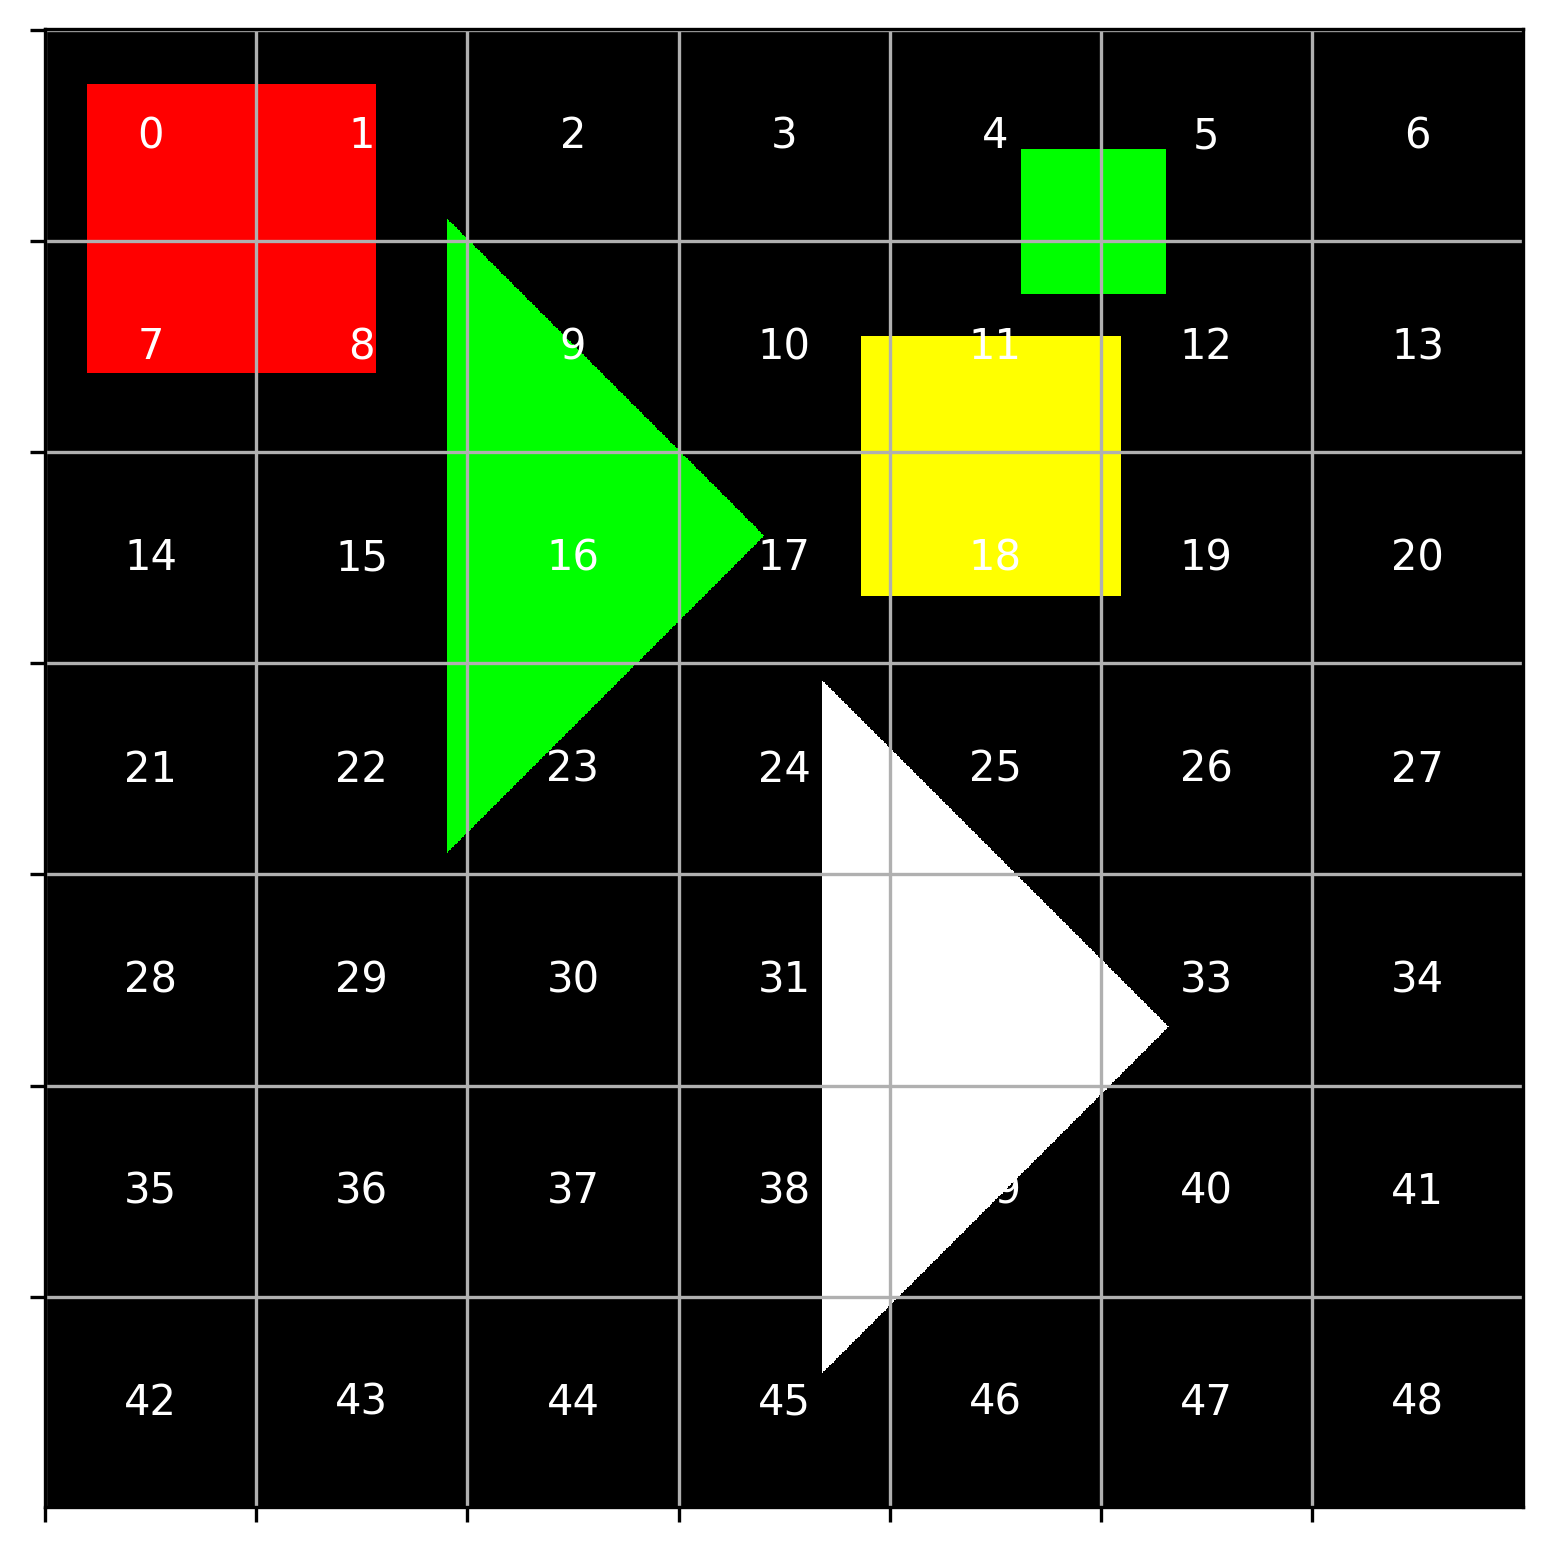

In [29]:
import transformer_patches

transformer_patches.open_image_withpatches(f"{img_id}.png", "pos", "train", to_save=False)

## Performance with black background

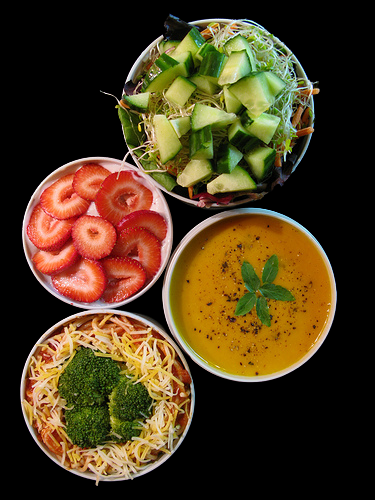

In [30]:
from PIL import Image

img_path = "../../../images/" + "2375454_nobg.png"
image = Image.open(img_path)
image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


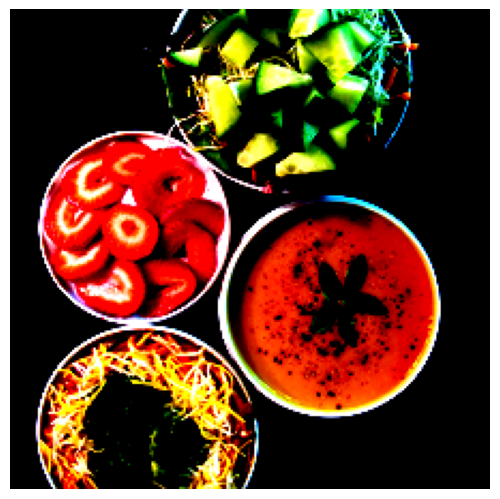

In [31]:
img = preprocess(Image.open(img_path)).permute(1,2,0)
plt.axis('off')
plt.imshow(img)
plt.subplots_adjust(bottom = 0)
plt.subplots_adjust(top = 1)
plt.subplots_adjust(right = 1)
plt.subplots_adjust(left = 0)
plt.savefig('natural_image_nobg_patches.png', bbox_inches='tight', pad_inches=0, transparent=True)

(480, 480)


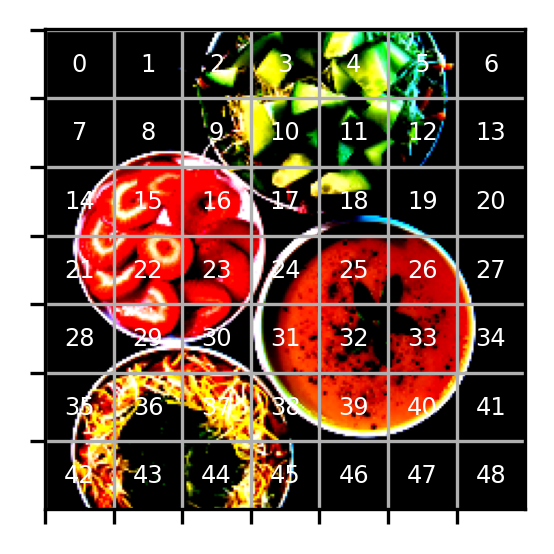

In [32]:
plot_with_patches("natural_image_nobg_patches.png")

In [33]:
reprs = utils.get_repr("../../../images/" + "2375454_nobg.png", device, model, preprocess)

In [34]:
reprs = [repr.detach().cpu().numpy() for repr in reprs]

In [35]:
patches = counter.get_object_patches(detect_probe, reprs, 7)
patches

[1,
 2,
 3,
 4,
 5,
 7,
 8,
 9,
 10,
 11,
 12,
 15,
 16,
 18,
 19,
 21,
 22,
 23,
 24,
 26,
 27,
 28,
 29,
 30,
 32,
 33,
 34,
 36,
 37,
 38,
 40,
 41,
 42,
 43,
 44,
 45]

In [36]:
object_sets, probs_dict = get_object_sets(reprs, 7, binding_probe_normal, detect_probe)

In [37]:
len(object_sets)

21

In [38]:
object_sets

{frozenset({9, 10, 18, 19}),
 frozenset({26, 33, 34, 41}),
 frozenset({32}),
 frozenset({43}),
 frozenset({36}),
 frozenset({1, 2, 8, 9}),
 frozenset({23}),
 frozenset({16}),
 frozenset({7, 8, 9}),
 frozenset({22}),
 frozenset({11}),
 frozenset({42}),
 frozenset({15}),
 frozenset({4}),
 frozenset({38, 44, 45}),
 frozenset({5, 12, 19, 26}),
 frozenset({24, 28, 29, 30}),
 frozenset({3}),
 frozenset({37, 38}),
 frozenset({21}),
 frozenset({18, 19, 24, 26, 27, 30, 34, 38, 40, 41})}

## Make some edits

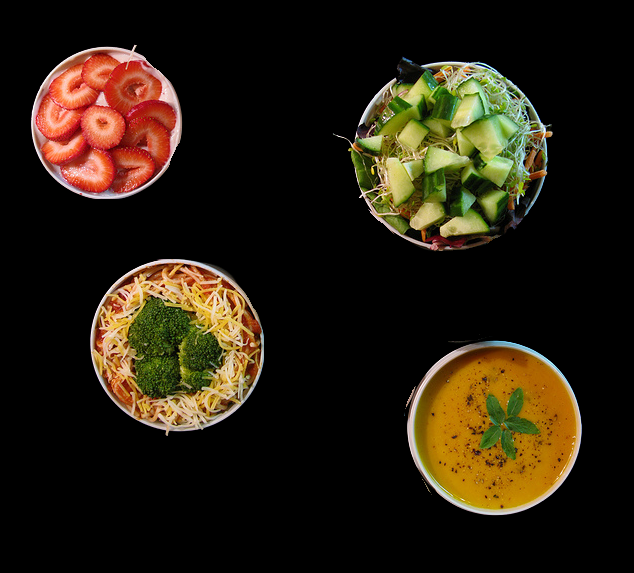

In [56]:
from PIL import Image

img_path = "../../../images/" + "2375454_nobg_edit (1).png"
image = Image.open(img_path)
image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


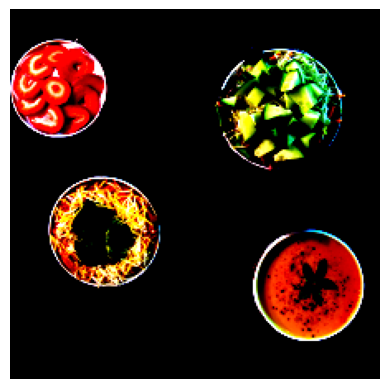

In [57]:
img = preprocess(Image.open(img_path)).permute(1,2,0)
plt.axis('off')
plt.imshow(img)
plt.savefig('natural_image_nobg_edits (1).png', bbox_inches='tight', pad_inches=0, transparent=True)

(369, 369)


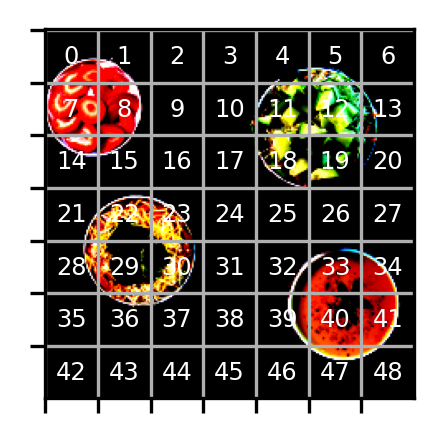

In [58]:
plot_with_patches("natural_image_nobg_edits (1).png")

In [59]:
reprs = utils.get_repr("../../../images/" + "natural_image_nobg_edits (1).png", device, model, preprocess)
reprs = [repr.detach().cpu().numpy() for repr in reprs]
patches = counter.get_object_patches(detect_probe, reprs, 7)
patches

[0,
 1,
 4,
 5,
 6,
 7,
 8,
 10,
 11,
 13,
 14,
 15,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 25,
 28,
 29,
 30,
 32,
 33,
 34,
 36,
 37,
 39,
 40,
 41,
 46,
 47,
 48]

In [60]:
object_sets, probs_dict = get_object_sets(reprs, 7, binding_probe_normal, detect_probe)
print(len(object_sets))

13


In [61]:
object_sets

{frozenset({11}),
 frozenset({4, 5, 6, 10, 13, 17, 25}),
 frozenset({21, 22, 23, 28, 30, 36, 37}),
 frozenset({0, 1}),
 frozenset({20}),
 frozenset({7}),
 frozenset({1, 8}),
 frozenset({29}),
 frozenset({34, 39, 40, 41, 46, 47, 48}),
 frozenset({19, 25}),
 frozenset({32, 33, 34, 39, 41, 46, 47, 48}),
 frozenset({14, 15}),
 frozenset({18, 25})}

### What happens if we hardcode the correct patches with objects?

In [52]:
import counter
from collections import defaultdict
import copy

best_patches = [0,1,4,5,7,8,10,11,12,13,14,15,17,18,19,20,21,22,23,28,29,30,32,33,34,36,37,39,40,41,47,48]
# best_patches = [0,1,4,5,7,8,10,11,12]

def get_object_sets_hardcoded(reprs, layer, binding_probe, detect_probe):

    # object_patches = counter.get_object_patches(detect_probe, reprs, layer)
    object_patches = best_patches
    object_patches_to_explore = copy.deepcopy(object_patches)
    object_sets = set()
    probs_dict = defaultdict(lambda: [])
    for patch in object_patches:
        if patch in object_patches_to_explore:

            object_set, prob = get_object_set(
                patch, copy.deepcopy(object_patches), binding_probe, reprs, layer
            )
            for patch in object_set:
                if patch in object_patches_to_explore:
                    object_patches_to_explore.remove(patch)
            object_sets.add(frozenset(object_set))
            probs_dict[frozenset(object_set)].append(prob)

    return object_sets, probs_dict

In [53]:
object_sets, probs_dict = get_object_sets_hardcoded(reprs, 7, binding_probe_normal, detect_probe)
print(len(object_sets))

13


In [54]:
object_sets

{frozenset({11}),
 frozenset({32, 33, 34, 39, 41, 47, 48}),
 frozenset({0, 1}),
 frozenset({20}),
 frozenset({7}),
 frozenset({1, 8}),
 frozenset({4, 5, 10, 12, 13, 17}),
 frozenset({18}),
 frozenset({29}),
 frozenset({19}),
 frozenset({14, 15}),
 frozenset({34, 39, 40, 41, 47, 48}),
 frozenset({21, 22, 23, 28, 30, 36, 37})}